<a href="https://colab.research.google.com/github/wareissoft/2024_VAI/blob/main/%EC%8B%9C%EA%B0%81%EC%A7%80%EB%8A%A5_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 라이브러리 임포트

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

2. MNIST test dataset 가져오기

In [21]:
mnist_test = dset.MNIST("", train = False, transform = transforms.ToTensor(),
                        target_transform = None, download = True)

3. 대략적인 데이터 형태

mnist_test 길이:  10000
image data 형태:  torch.Size([1, 28, 28])
label:  7


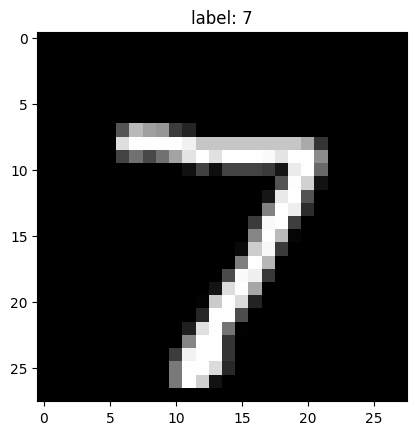

In [22]:
print ("mnist_test 길이: ", len(mnist_test))

image, label = mnist_test.__getitem__(0)
print ("image data 형태: ", image.size())
print ("label: ", label)

img = image.numpy()
plt.title ("label: %d" %label)
plt.imshow(img[0], cmap = 'gray')
plt.show()

4. sigmoid, softmax 함수 구현

In [23]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [24]:
def softmax(x):
  e_x = np.exp(x)
  return e_x / np.sum(e_x)

5. 모델 선언

In [25]:
class MyMLP:
  def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
    self.W1 = np.zeros((n_hidden1, n_input), dtype = np.float32)
    self.b1 = np.zeros((n_hidden1,), dtype = np.float32)

    self.W2 = np.zeros((n_hidden2, n_hidden1), dtype = np.float32)
    self.b2 = np.zeros((n_hidden2,), dtype = np.float32)

    self.W3 = np.zeros((n_output, n_hidden2), dtype = np.float32)
    self.b3 = np.zeros((n_output), dtype = np.float32)

  def __call__(self, x):
    x = x.reshape(-1)

    h1 = sigmoid(np.dot(self.W1, x) + self.b1)
    h2 = np.dot(self.W2, h1) + self.b2
    out = np.dot(self.W3, h2) + self.b3

    return softmax(out)

6. 모델 생성

In [26]:
model = MyMLP(28 * 28, 256, 128, 10)

In [27]:
print ((model.W1.shape), (model.b1.shape))
print ((model.W2.shape), (model.b2.shape))
print ((model.W3.shape), (model.b3.shape))

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


7. 미리 학습된 weight 로드

In [31]:
weights = np.load("./nets/mlp_weight.pkl")
model.W1 = weights["W1"]
model.b1 = weights["b1"]
model.W2 = weights["W2"]
model.b2 = weights["b2"]
model.W3 = weights["W3"]
model.b3 = weights["b3"]

print ((model.W1.shape), (model.b1.shape))
print ((model.W2.shape), (model.b2.shape))
print ((model.W3.shape), (model.b3.shape))

FileNotFoundError: [Errno 2] No such file or directory: './nets/mlp_weight.pkl'

8. 테스트

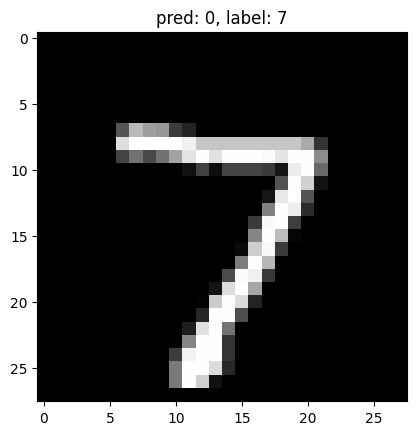

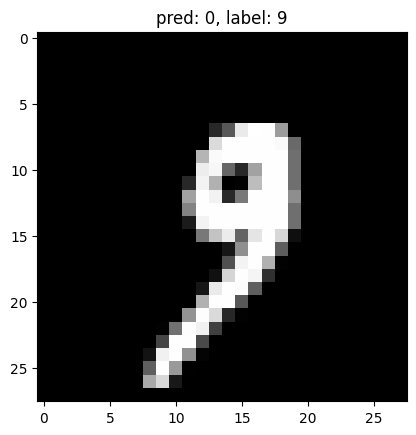

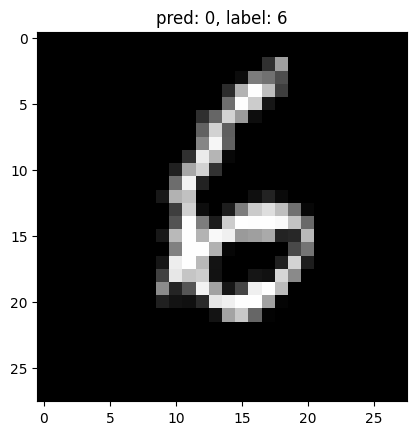

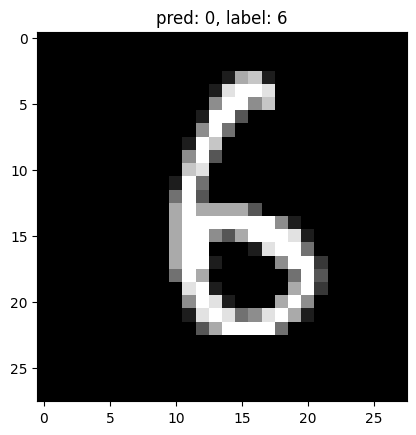

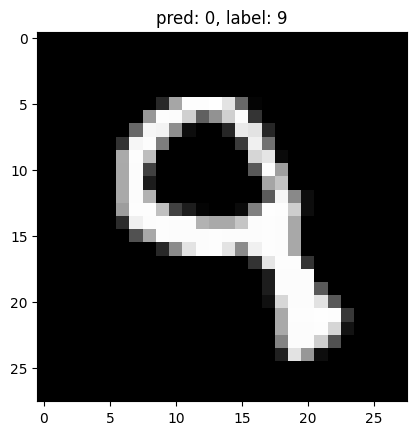

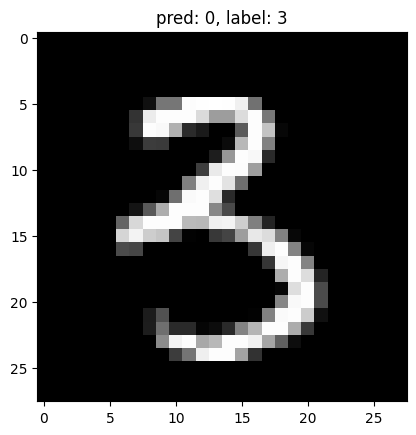

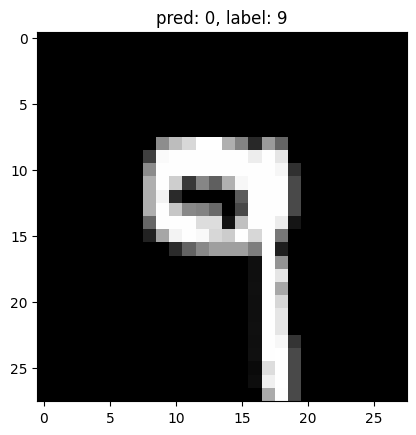

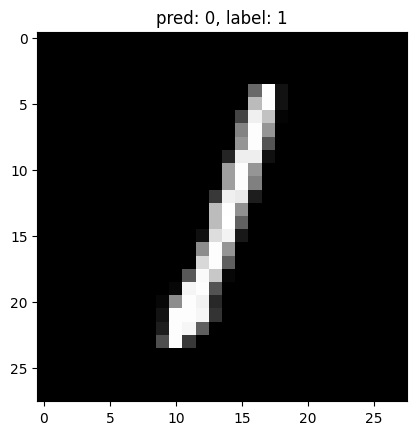

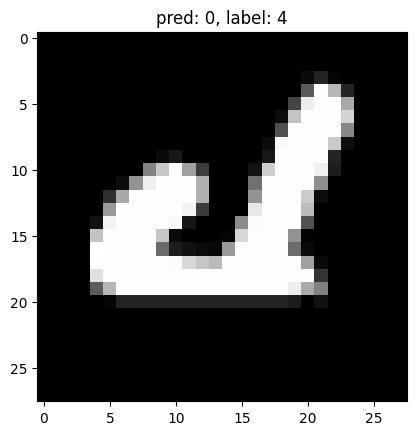

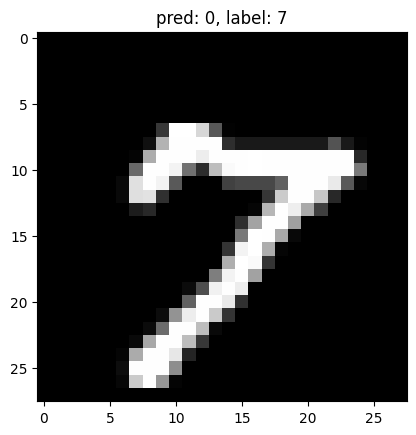

정확도: 9.80


In [29]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
  image, label = mnist_test.__getitem__(i)
  out = model(image)

  if(i % 1000 == 0):
    img = image.numpy()
    pred_label = np.argmax(out)
    plt.title ("pred: %d, label: %d" % (pred_label, label))
    plt.imshow(img[0], cmap = 'gray')
    plt.show()

  cnt += 1
  mysum += (np.argmax(out) == label)

print ("정확도: %.2f" % ((float(mysum) / cnt) * 100.0))